## 0 - MODULES

In [1]:
# Classic
import numpy as np
import pandas as pd
import sys

# Perso
sys.path.append('../Mars-craters-challenge/')
from object_detector_Unet import *

# Ramp
sys.path.append('../')
import problem

# Graphic
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - MODEL

In [2]:
device = 'cuda:0'

# Main class
detector = ObjectDetector()

# Trained weights
model_path = '../models/craters_49_5e-4.model'
detector.net.load_state_dict(torch.load(model_path))

Creating neural network on GPU...done
>> 18888241 parameters



## 2 - DATA

In [3]:
data_path = '../'

Xtrain, Ytrain = problem.get_train_data(data_path)
Xtrain.shape, Ytrain.shape

((9000, 224, 224), (9000,))

## 3 - PREDICTION

In [4]:
%time Ytest = detector.predict(Xtrain[:50], threshold=0.4)

CPU times: user 1.37 s, sys: 615 ms, total: 1.99 s
Wall time: 2.05 s


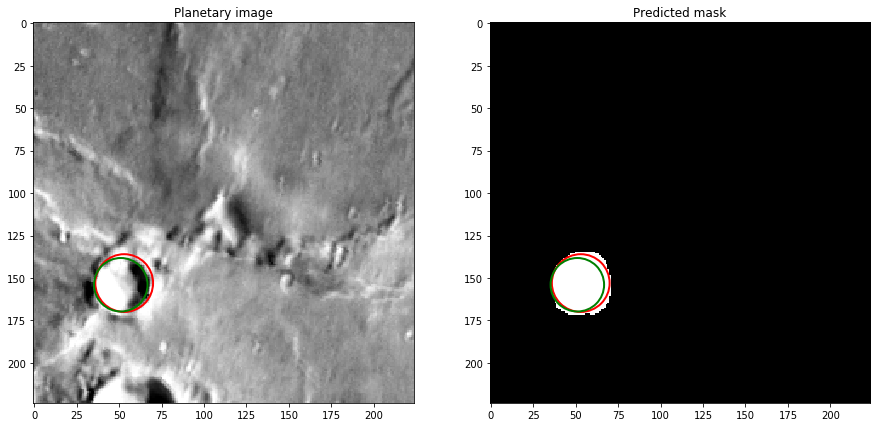

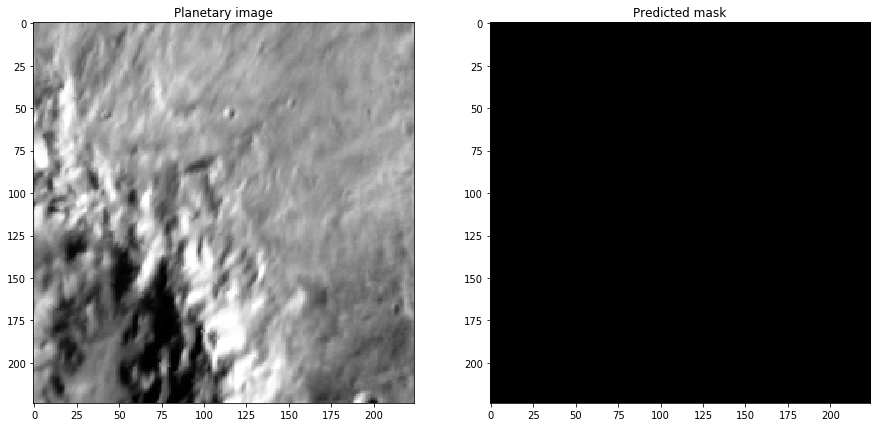

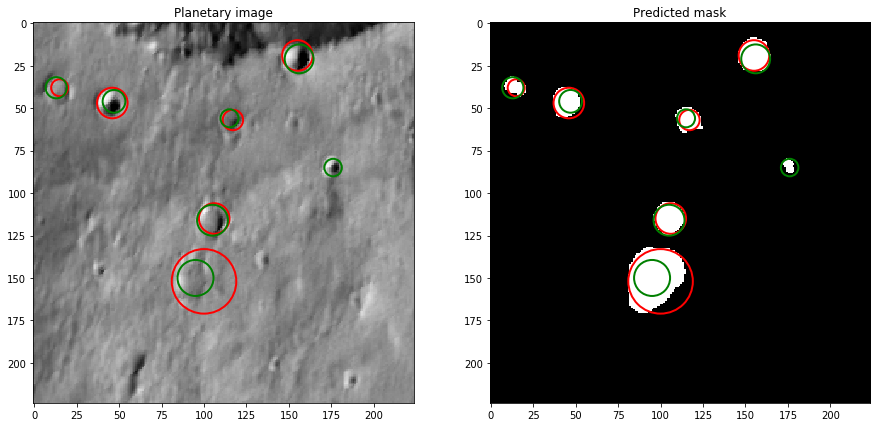

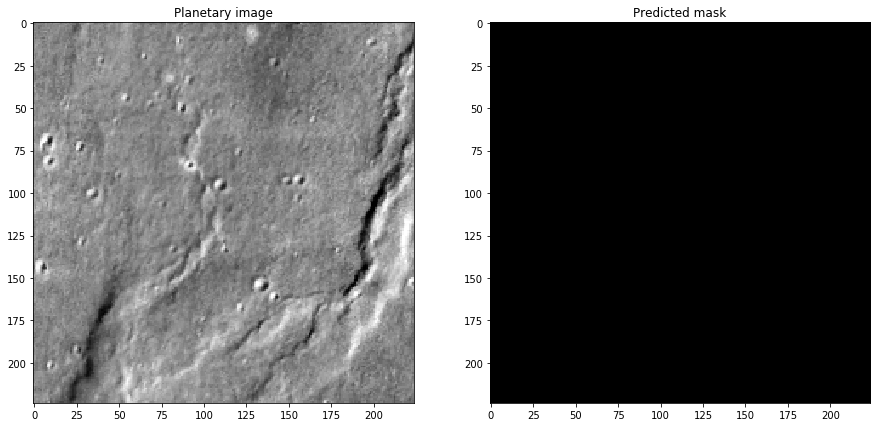

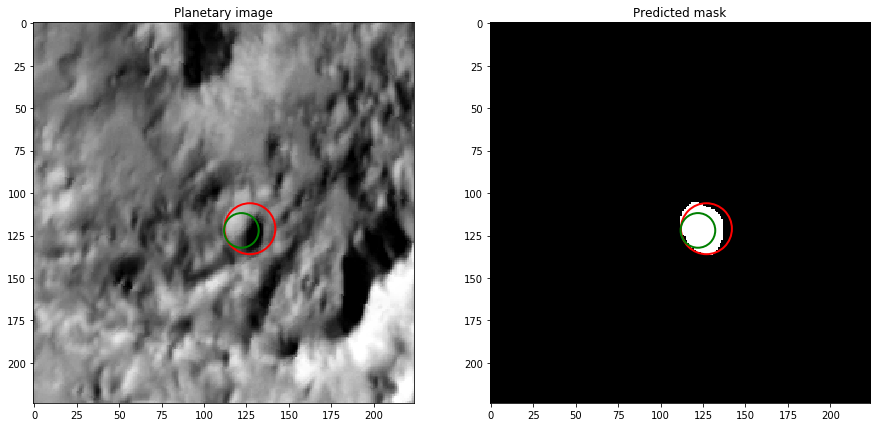

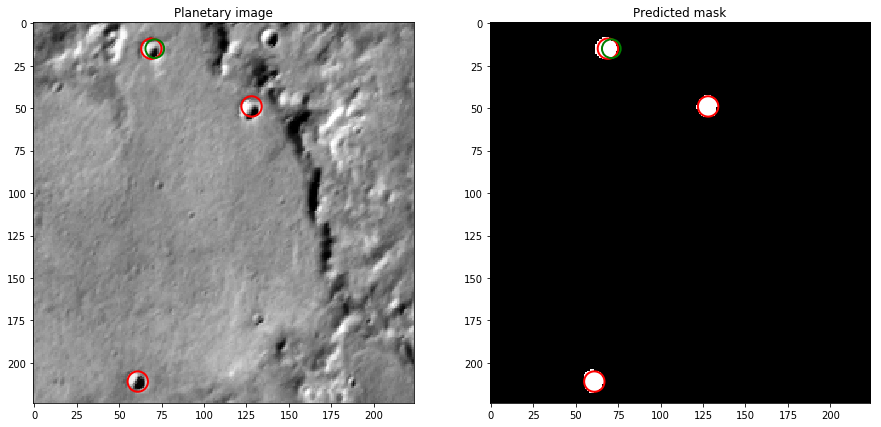

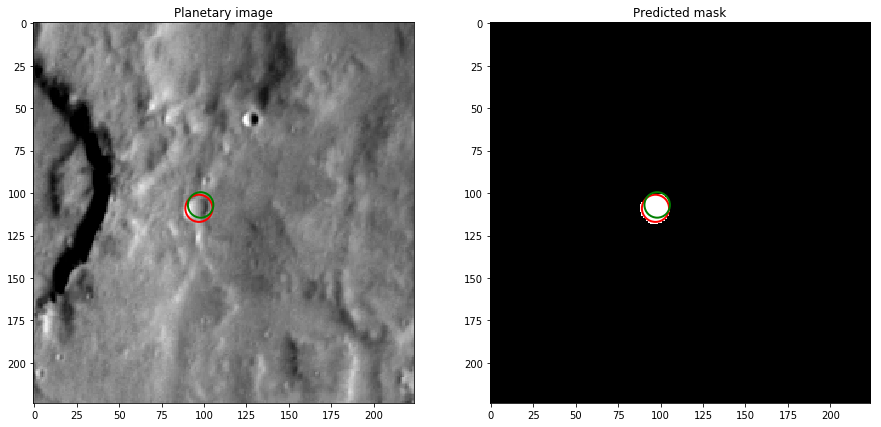

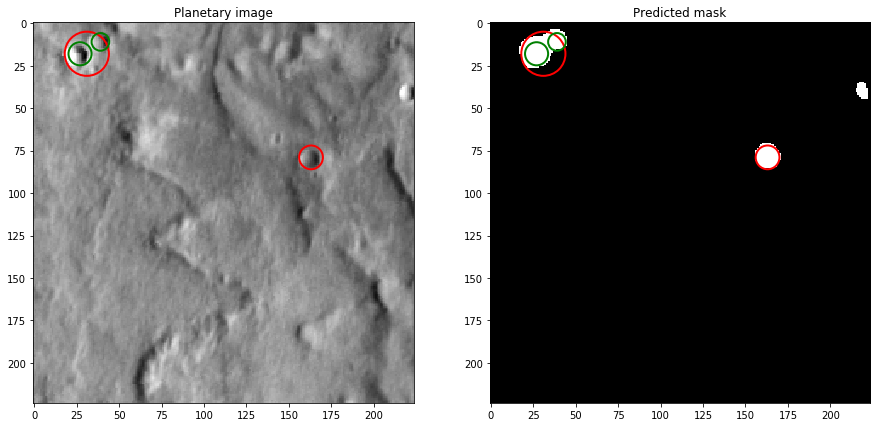

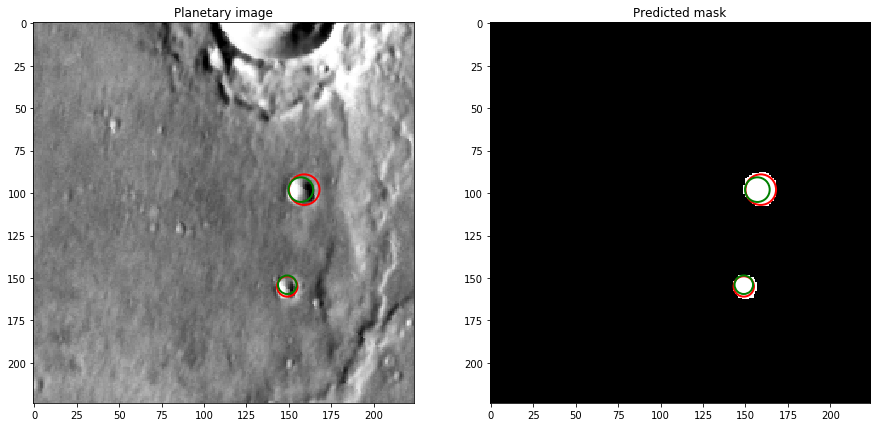

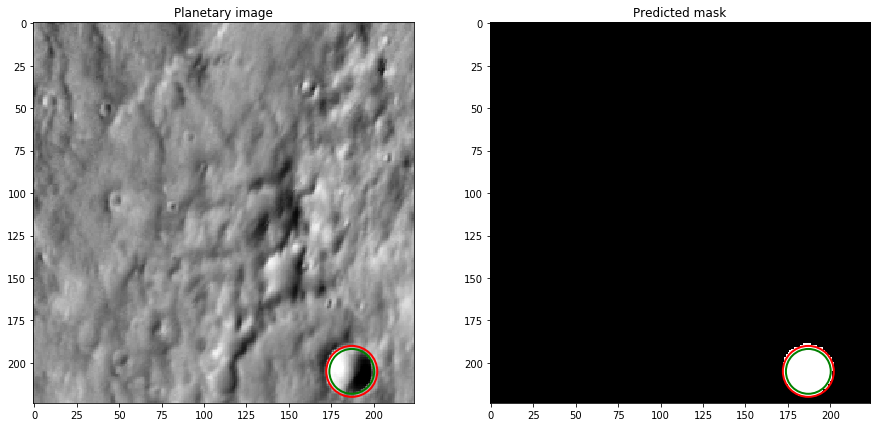

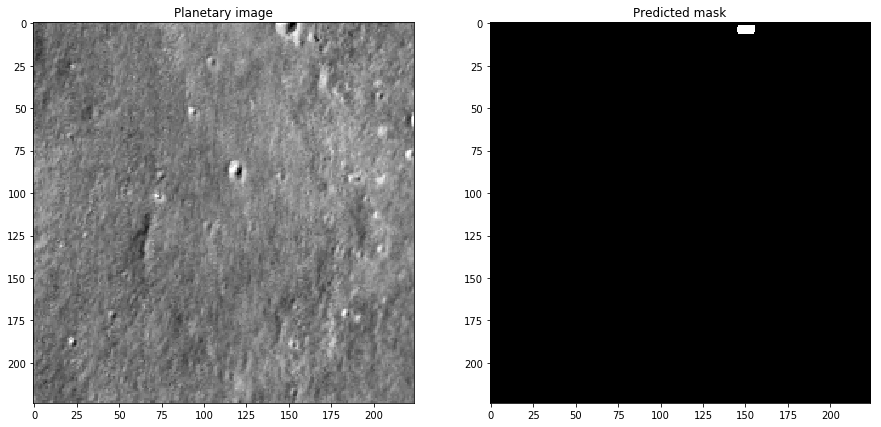

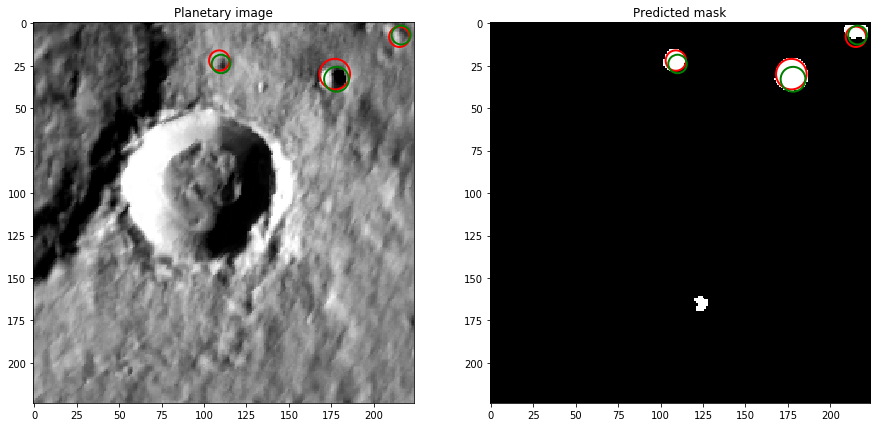

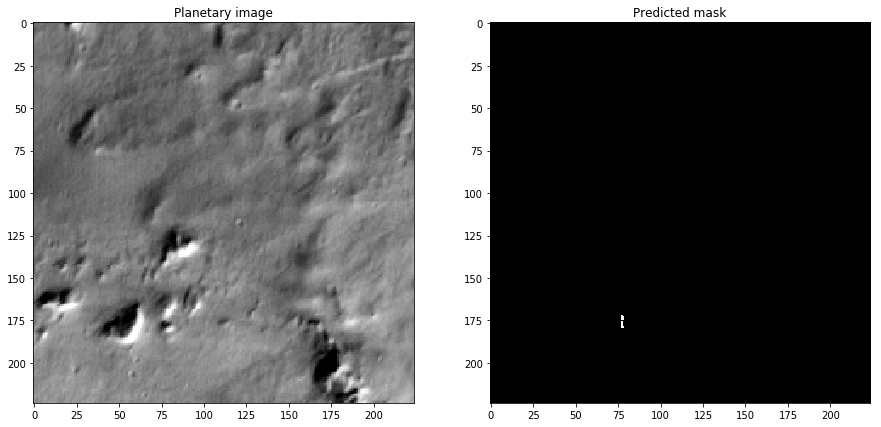

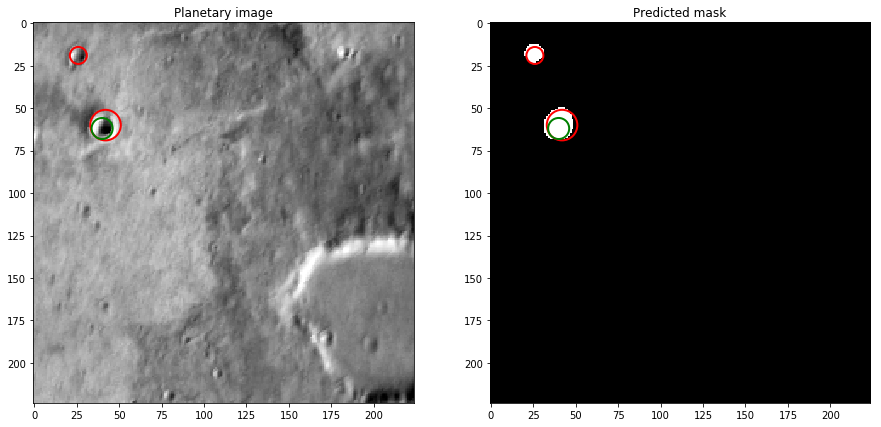

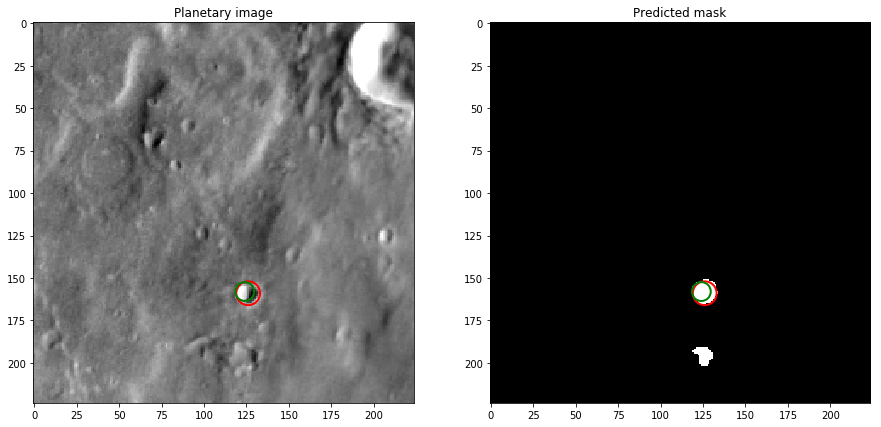

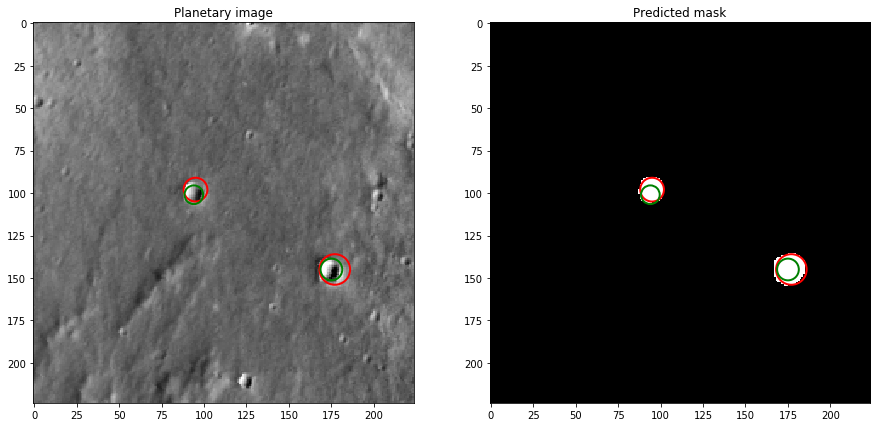

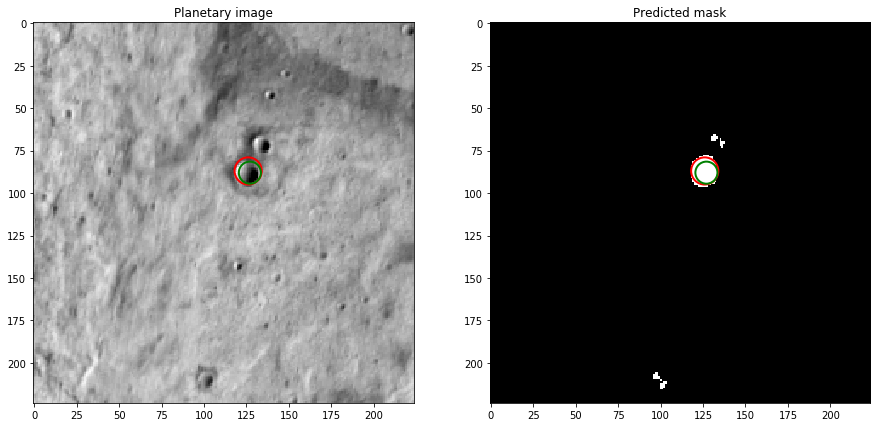

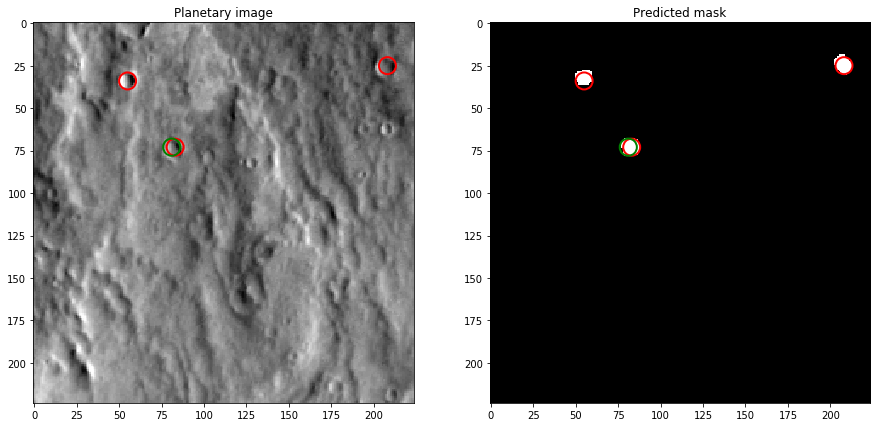

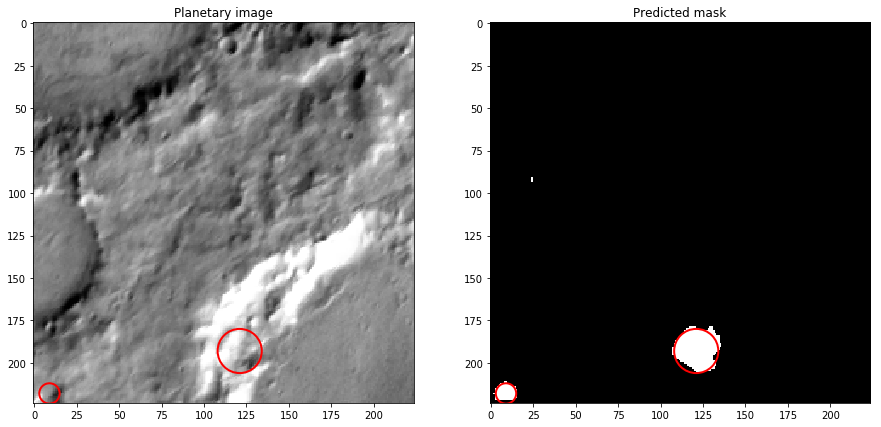

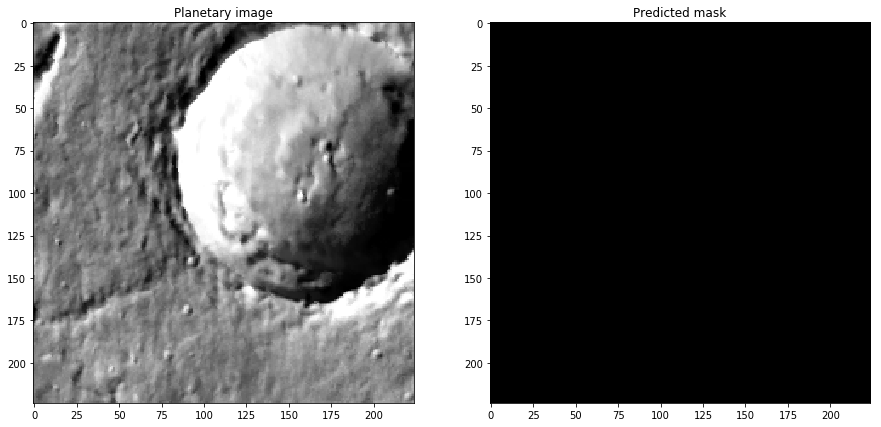

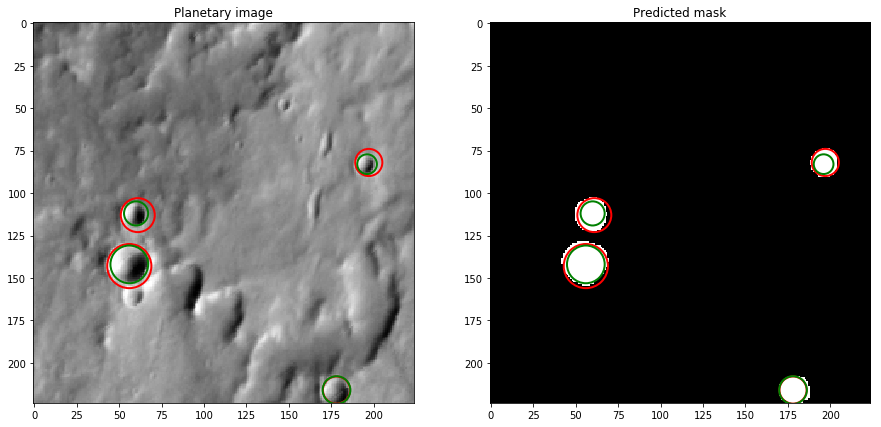

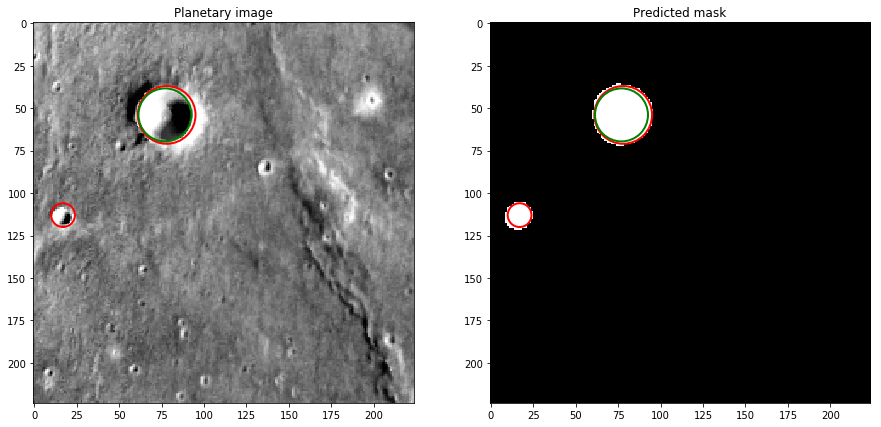

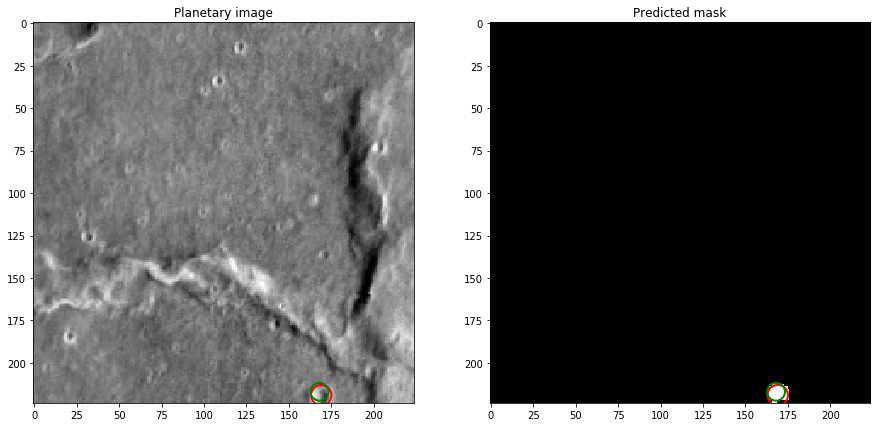

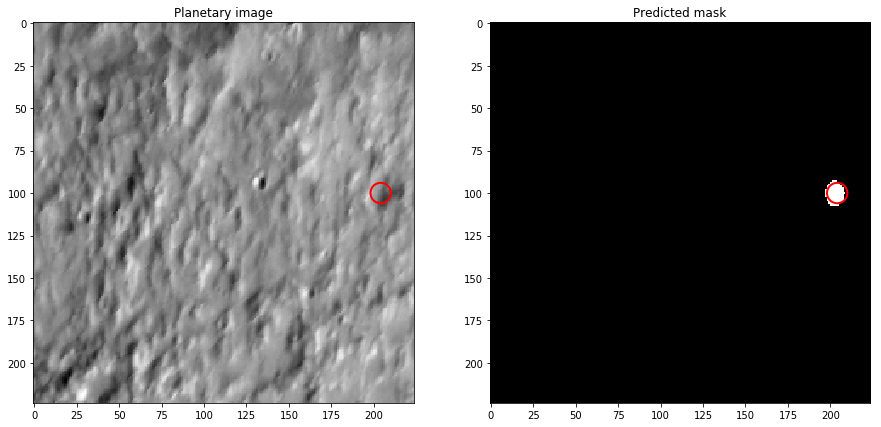

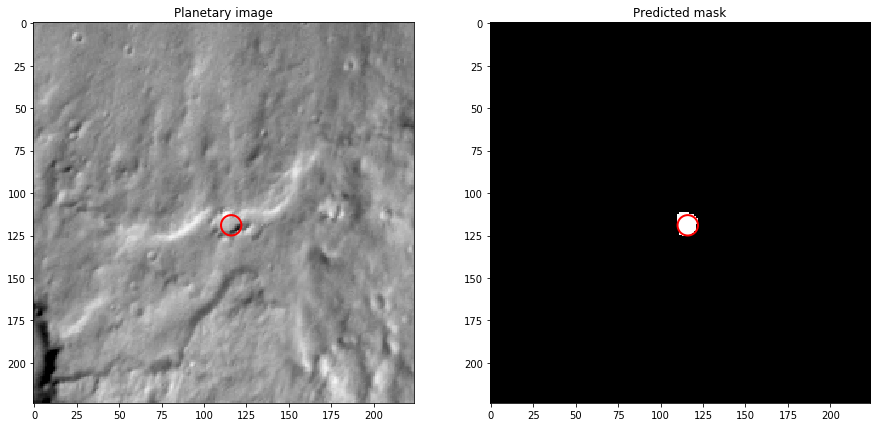

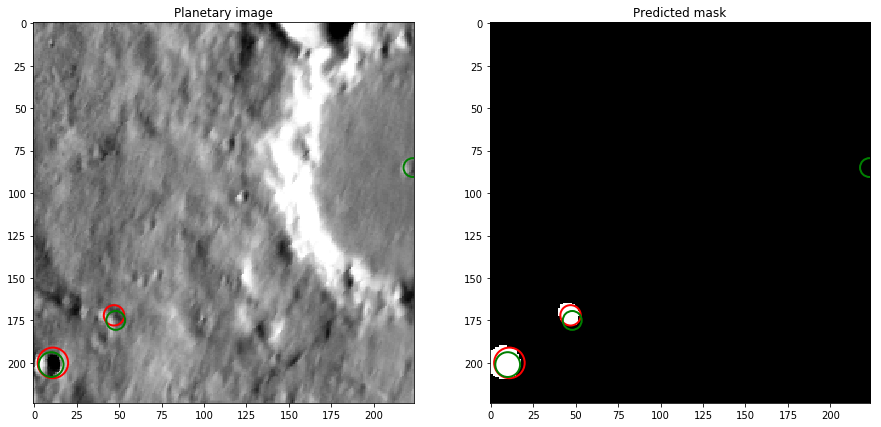

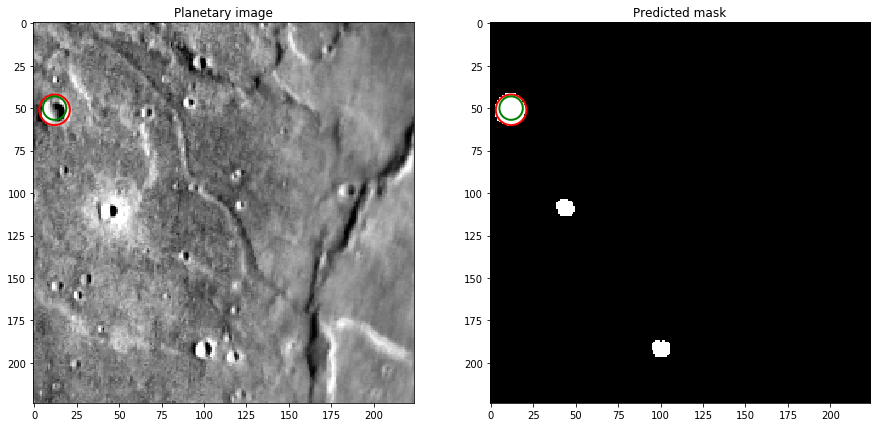

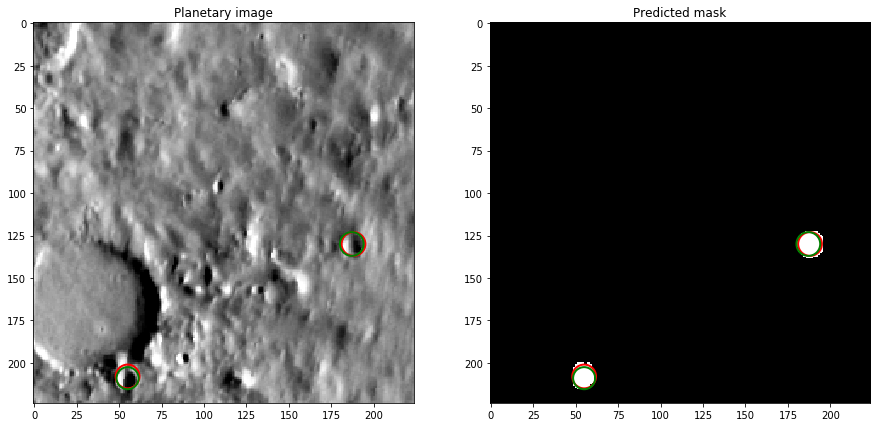

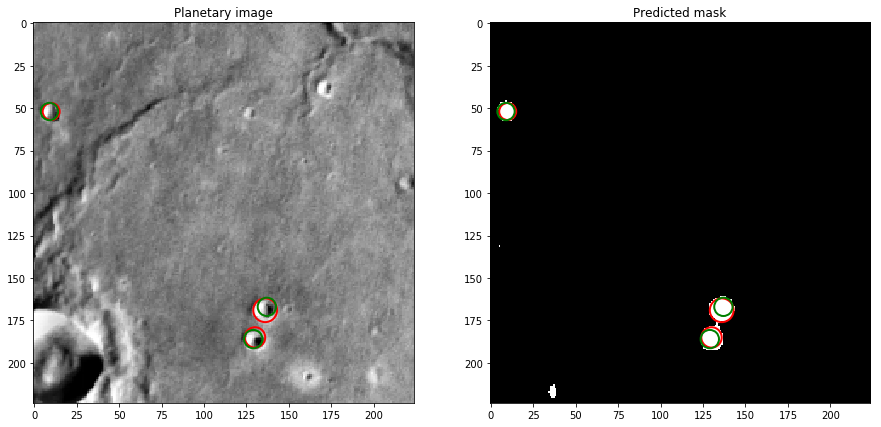

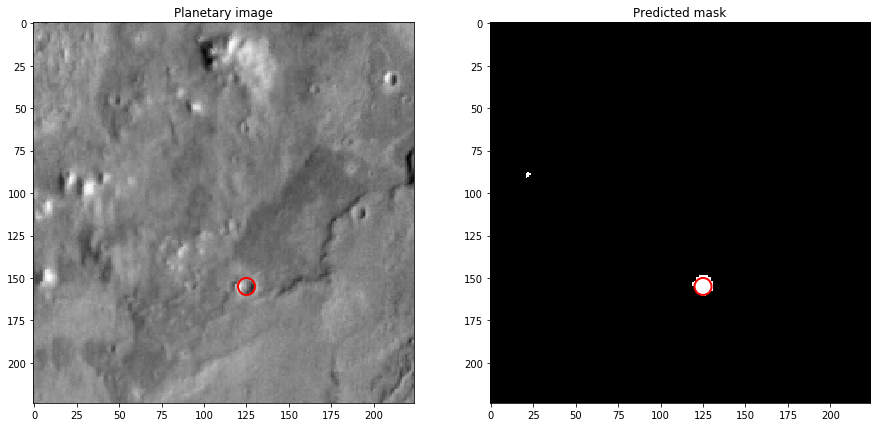

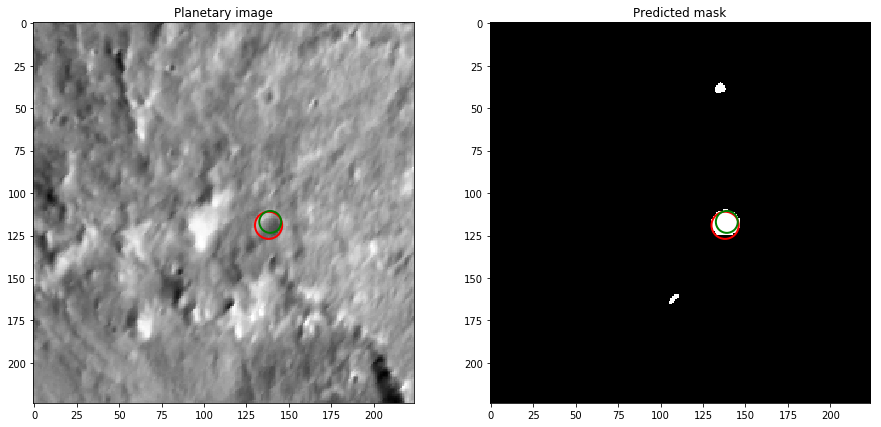

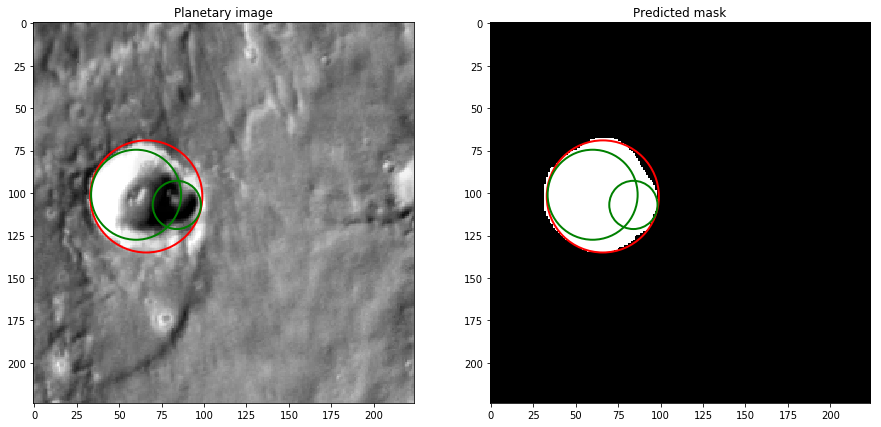

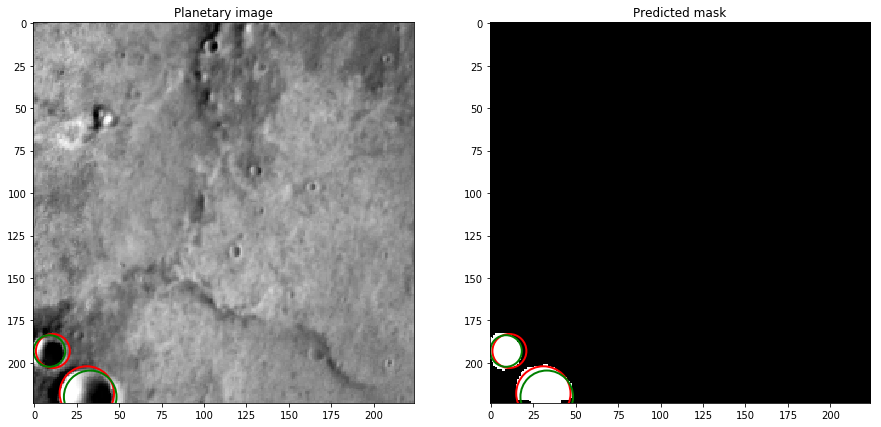

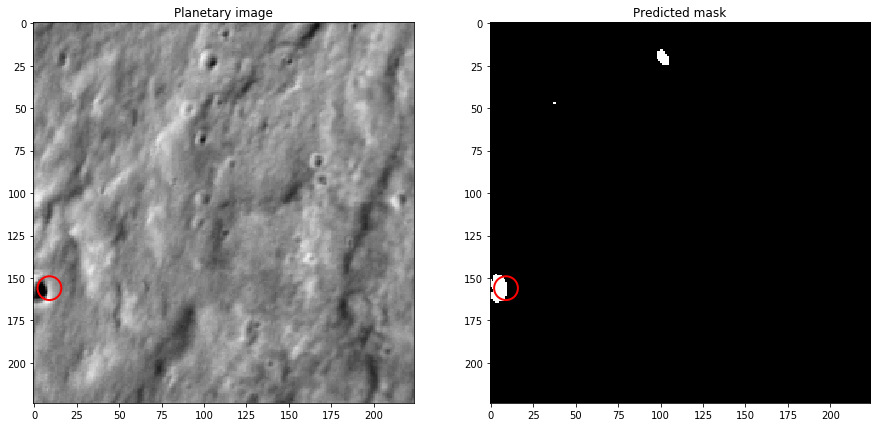

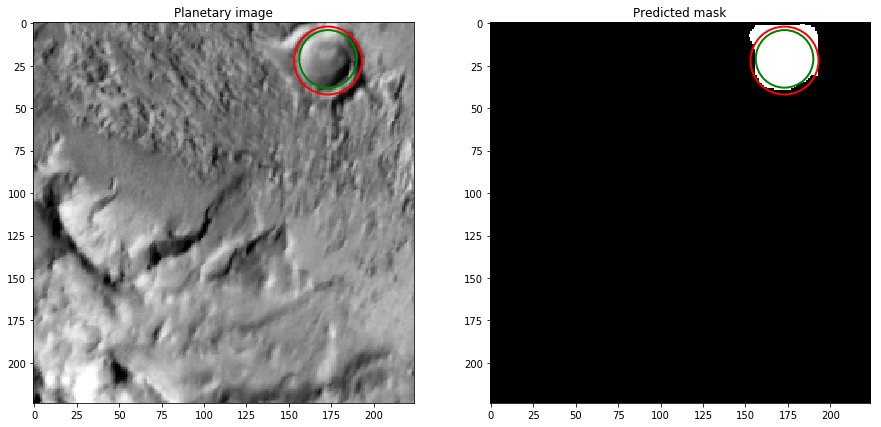

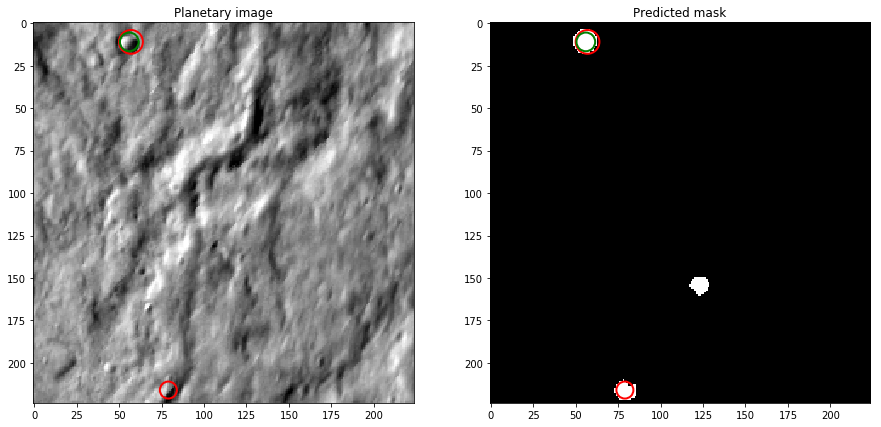

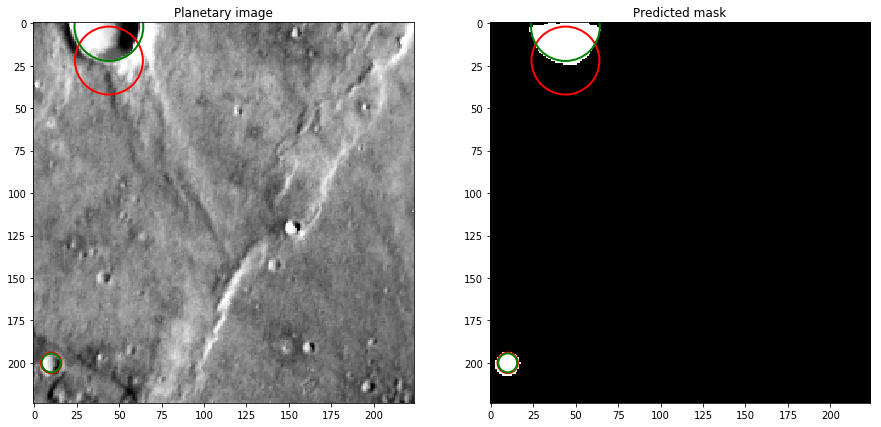

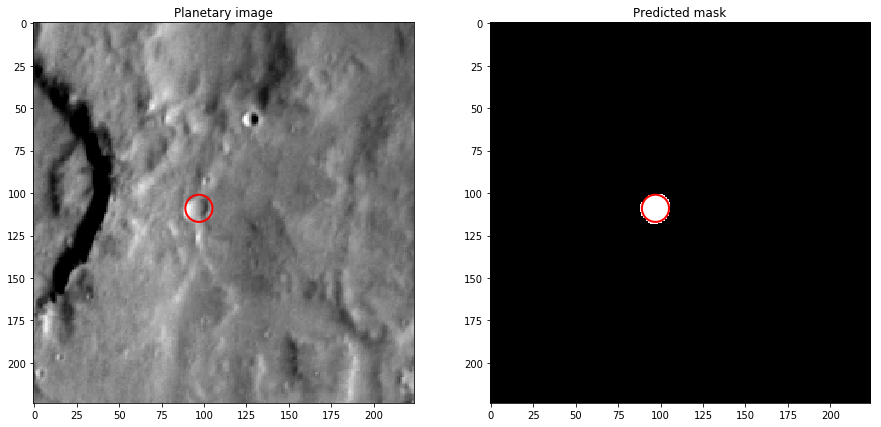

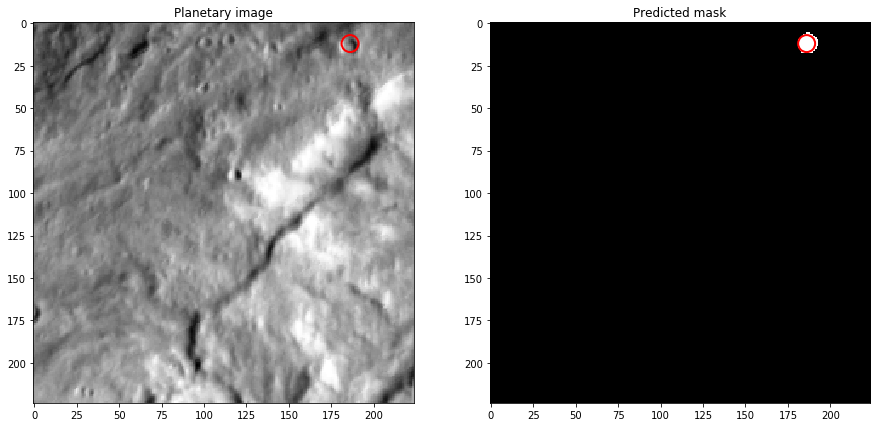

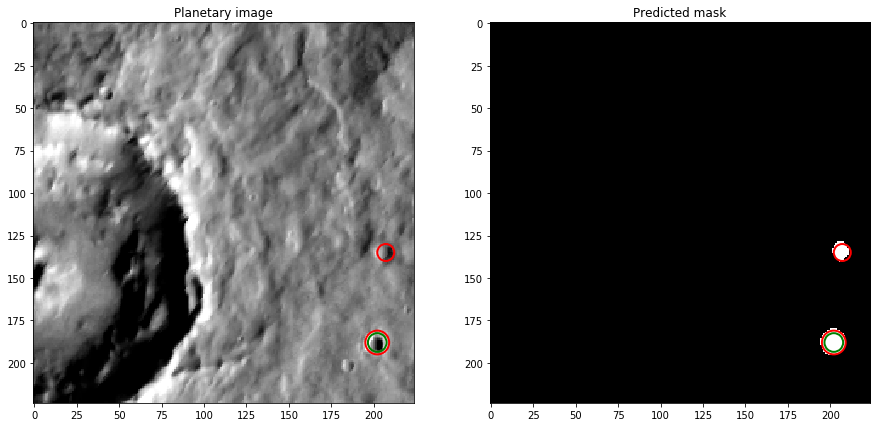

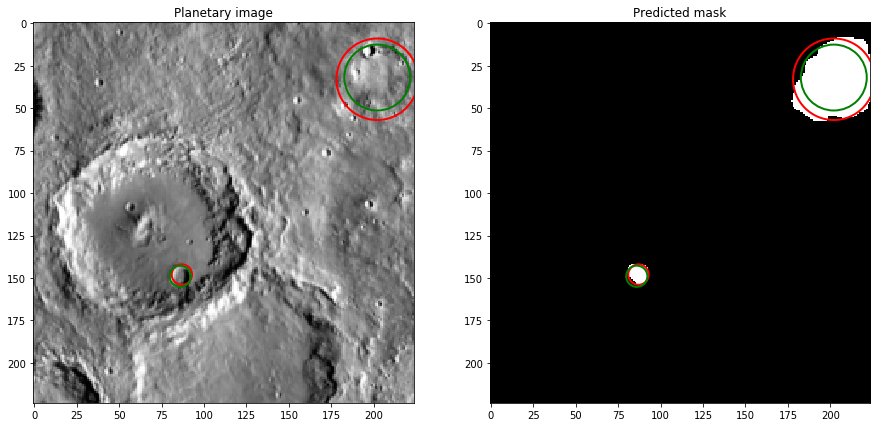

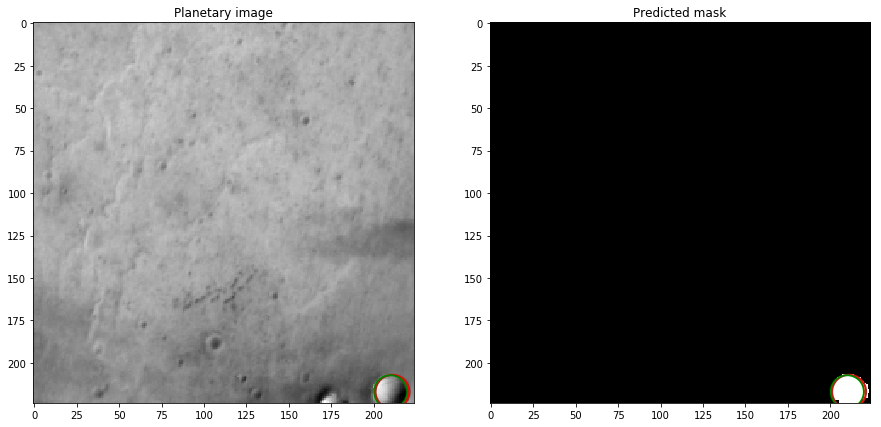

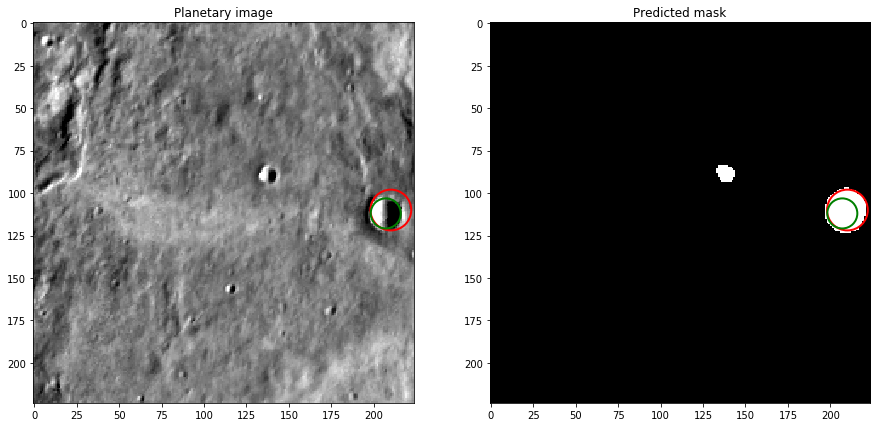

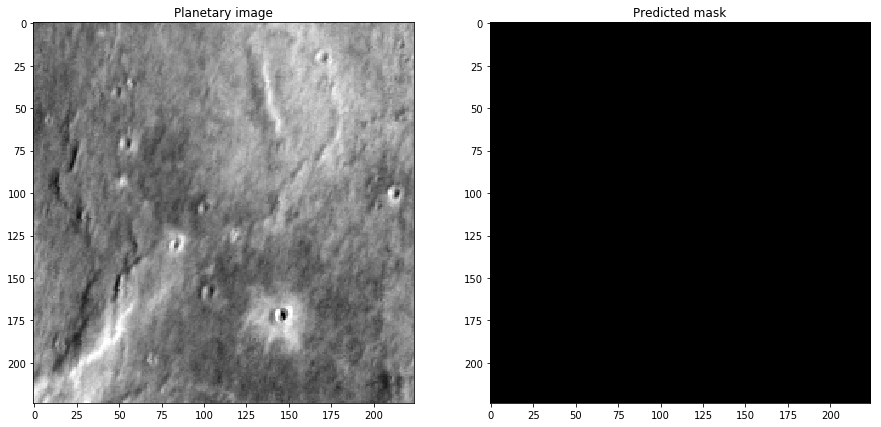

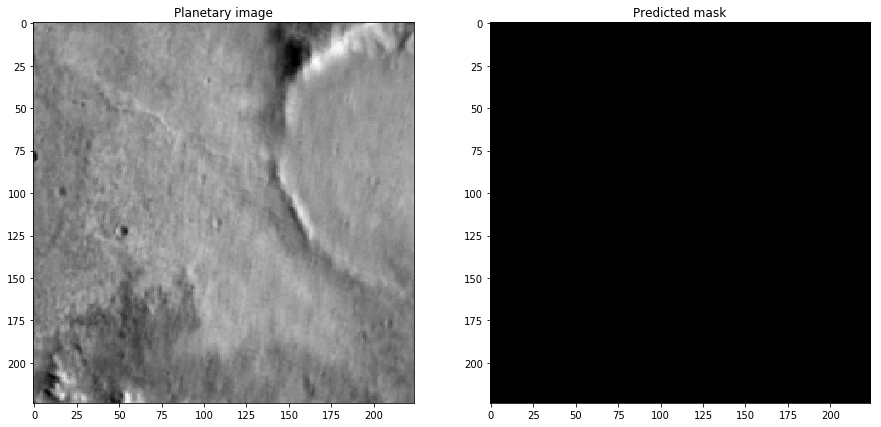

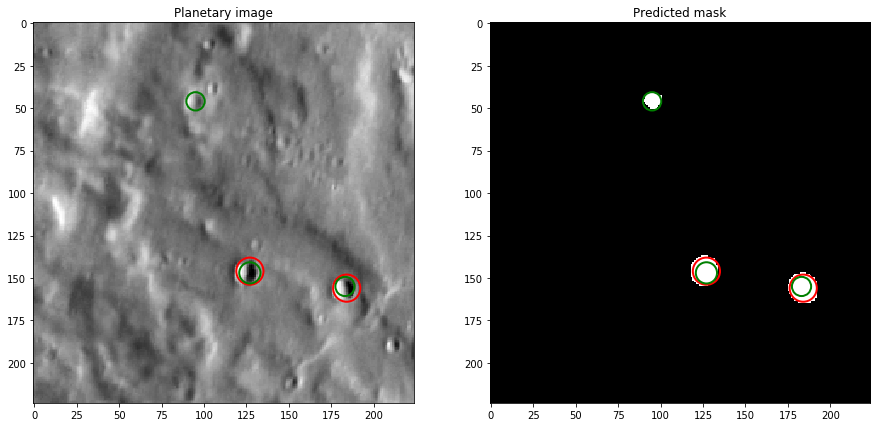

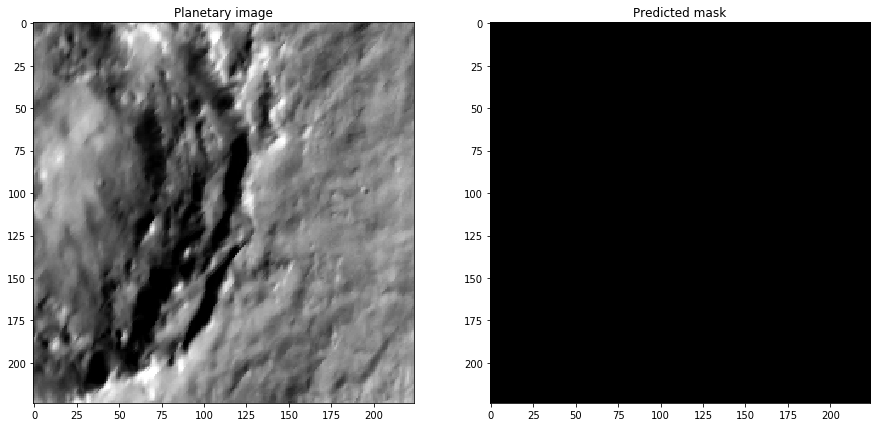

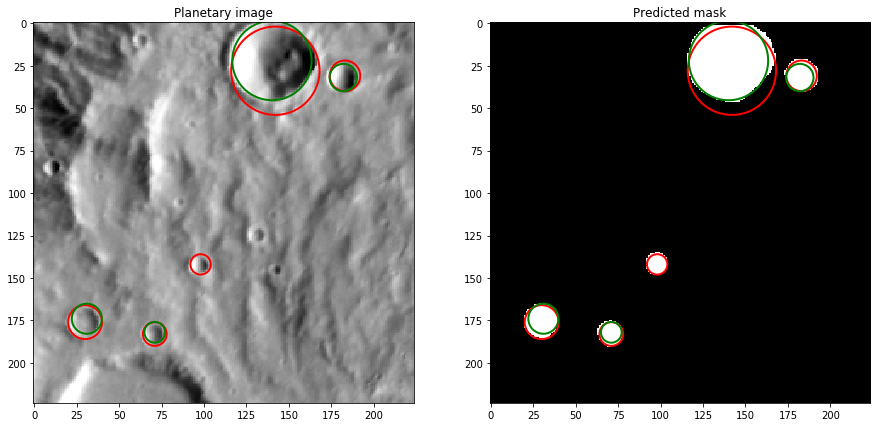

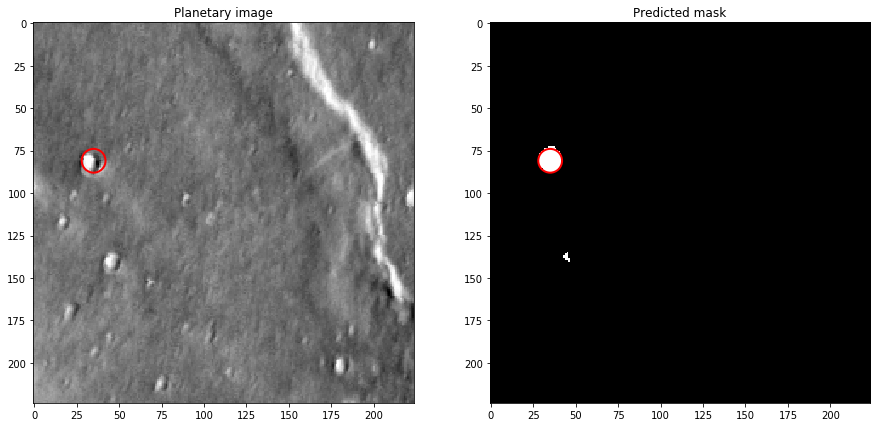

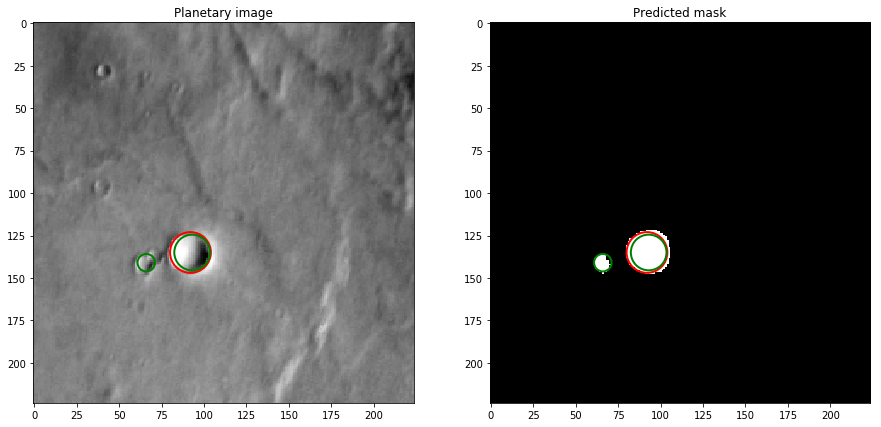

In [5]:
for image_idx in range(50):

    X = Xtrain[image_idx]
    input_temp = torch.tensor(X / 255, dtype=torch.float).unsqueeze(0).unsqueeze(0).to(device)
    mask = detector.net(input_temp).squeeze()
    prediction = get_prediction(mask, 0.3)
    prediction = prediction.cpu().numpy()
        
    circles = Ytest[image_idx]
    if len(circles) != 0:
        circles = circles[:, 1:4]
    true_circles = Ytrain[image_idx]

    fig, ax = plt.subplots(figsize=(15, 10), ncols=2)

    ax[0].imshow(X * 255, cmap=plt.cm.gray)
    ax[1].imshow(prediction, cmap=plt.cm.gray)

    ax[0].set_title('Planetary image')
    ax[1].set_title('Predicted mask')

    for y, x, r in circles:
        ax[0].add_patch(plt.Circle((x, y), r, color='red', fill=False, linewidth=2))
        ax[1].add_patch(plt.Circle((x, y), r, color='red', fill=False, linewidth=2))
        
    for y, x, r in true_circles:
        ax[0].add_patch(plt.Circle((x, y), r, color='green', fill=False, linewidth=2))
        ax[1].add_patch(plt.Circle((x, y), r, color='green', fill=False, linewidth=2))
            
    plt.show()